In [33]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

#@save
def generate_examples(w, b, num_examples):
    X: torch.Tensor = torch.normal(0, 1, (num_examples, len(w)))
    y: torch.Tensor = torch.matmul(X, w) + b

    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = generate_examples(true_w, true_b, 1000)

1000 tensor([[-0.4978,  0.0364],
        [ 0.9164, -1.2889],
        [ 1.3817, -0.6661],
        ...,
        [-1.0455, -0.5982],
        [-0.9694, -0.7733],
        [ 0.1824,  0.3020]])


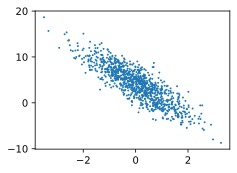

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [23]:
import random

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = [i for i in range(num_examples)]
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [28]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y, y_hat):
    return 0.5 * (y - y_hat)**2

In [26]:
def sgd(params, learning_rate, batch_size):
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()

In [31]:
batch_size = 10
learning_rate = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

w = torch.normal(0, 0.01, (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(y, net(X, w, b))
        l.sum().backward()
        sgd([w, b], learning_rate, batch_size)
    with torch.no_grad():
        train_l = loss(labels, net(features, w, b))
        print(f'epoch {epoch + 1}, loss: {float(train_l.mean()):f}')

print(w, b)

epoch 1, loss: 0.049216
epoch 2, loss: 0.000203
epoch 3, loss: 0.000050
tensor([[ 1.9997],
        [-3.3998]], requires_grad=True) tensor([4.1985], requires_grad=True)
